In [13]:
import os
import pandas as pd

# Set the path to your folder containing the files
folder_path = r'C:\saipragatheeswar\thesis phase2\object distance\data_objecr_label_2 - Copy\training\label_2'

# Initialize an empty list to store data from all files
all_data = []

# Loop through each file in the folder
for filename in os.listdir(folder_path):
    filepath = os.path.join(folder_path, filename)

    # Read the content of each file
    with open(filepath, 'r') as file:
        content = file.read()

    # Split the content into individual entries (assuming entries are separated by newline characters)
    entries = content.split('\n')

    # Loop through each entry in the file
    for entry in entries:
        # Skip empty entries
        if not entry:
            continue

        # Split the entry into individual values
        values = entry.split()

        # Create a dictionary to store the values with column names
        data_dict = {
            'Object Type': values[0],
            'Truncation': float(values[1]),
            'Occlusion State': int(values[2]),
            'Alpha Rotation': float(values[3]),
            'Bounding Box Coordinates': [float(val) for val in values[4:8]],
            'Dimensions': [float(val) for val in values[8:11]],
            'Location': [float(val) for val in values[11:14]],
            'Rotation_y': float(values[14]),
            'Distance' : float(values[15])
        }

        # Append the dictionary to the list
        all_data.append(data_dict)

# Create a Pandas DataFrame from the list of dictionaries
df = pd.DataFrame(all_data)



In [14]:

# Write the DataFrame to an Excel file
output_folder = r'C:\saipragatheeswar\thesis phase2\object distance\output_1.xlsx'
os.makedirs(output_folder, exist_ok=True)  # Create the directory if it doesn't exist
excel_file_path = os.path.join(output_folder, 'output.xlsx')

# Write the DataFrame to an Excel file
df.to_excel(excel_file_path, index=False)

print(f'Data has been successfully written to {excel_file_path}')

Data has been successfully written to C:\saipragatheeswar\thesis phase2\object distance\output_1.xlsx\output.xlsx


In [5]:
import pandas as pd

df = pd.read_excel(r'C:\saipragatheeswar\thesis phase2\object distance\output_1.xlsx\output.xlsx')

In [7]:
import numpy as np
from sklearn.preprocessing import LabelEncoder

# Assuming 'df' is your DataFrame and 'text_column' is the column with text values
label_encoder = LabelEncoder()
df['encoded_column'] = label_encoder.fit_transform(df['Object Type'])


print(df.columns)

Index(['Object Type', 'Truncation', 'Occlusion State', 'Alpha Rotation',
       'Bounding Box Coordinates', 'Dimensions', 'Location', 'Rotation_y',
       'Distance', 'encoded_column'],
      dtype='object')


In [8]:
import pandas as pd

def convert_location_to_xyz(df, location_col):
    """
    Convert the 'Location' column into separate columns for x, y, and z coordinates.

    Args:
    df (DataFrame): The DataFrame containing the 'Location' column.
    location_col (str): The name of the 'Location' column.

    Returns:
    DataFrame: The DataFrame with 'Location_x', 'Location_y', and 'Location_z' columns.
    """
    # Convert string representation of lists to actual lists
    df[location_col] = df[location_col].apply(eval)

    # Create separate columns for x, y, and z coordinates
    df[['Location_x', 'Location_y', 'Location_z']] = pd.DataFrame(df[location_col].tolist(), columns=['Location_x', 'Location_y', 'Location_z'])

    # Drop the original 'Location' column
    df.drop(columns=[location_col], inplace=True)

    return df

# Usage example:
df = convert_location_to_xyz(df, 'Location')


In [9]:
import pandas as pd

def convert_bounding_box_to_xy(df, bounding_box_col):
    """
    Convert the 'Bounding Box Coordinates' column into separate columns for X1, Y1, X2, and Y2 coordinates.

    Args:
    df (DataFrame): The DataFrame containing the 'Bounding Box Coordinates' column.
    bounding_box_col (str): The name of the 'Bounding Box Coordinates' column.

    Returns:
    DataFrame: The DataFrame with 'BoundingBox_X1', 'BoundingBox_Y1', 'BoundingBox_X2', and 'BoundingBox_Y2' columns.
    """
    # Convert string representation of lists to actual lists
    df[bounding_box_col] = df[bounding_box_col].apply(eval)

    # Create separate columns for X1, Y1, X2, and Y2 coordinates
    df[['BoundingBox_X1', 'BoundingBox_Y1', 'BoundingBox_X2', 'BoundingBox_Y2']] = pd.DataFrame(df[bounding_box_col].tolist(), columns=['BoundingBox_X1', 'BoundingBox_Y1', 'BoundingBox_X2', 'BoundingBox_Y2'])

    # Drop the original 'Bounding Box Coordinates' column
    df.drop(columns=[bounding_box_col], inplace=True)

    return df

# Usage example:
df = convert_bounding_box_to_xy(df, 'Bounding Box Coordinates')


In [10]:
import pandas as pd

def convert_dimensions_to_xyz(df, dimensions_col):
    """
    Convert the 'Dimensions' column into separate columns for length, width, and height.

    Args:
    df (DataFrame): The DataFrame containing the 'Dimensions' column.
    dimensions_col (str): The name of the 'Dimensions' column.

    Returns:
    DataFrame: The DataFrame with 'Dimensions_Length', 'Dimensions_Width', and 'Dimensions_Height' columns.
    """
    # Convert string representation of lists to actual lists
    df[dimensions_col] = df[dimensions_col].apply(eval)

    # Create separate columns for length, width, and height
    df[['Dimensions_Length', 'Dimensions_Width', 'Dimensions_Height']] = pd.DataFrame(df[dimensions_col].tolist(), columns=['Dimensions_Length', 'Dimensions_Width', 'Dimensions_Height'])

    # Drop the original 'Dimensions' column
    df.drop(columns=[dimensions_col], inplace=True)

    return df

# Usage example:
df = convert_dimensions_to_xyz(df, 'Dimensions')


In [16]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from tensorflow import keras
from tensorflow.keras import layers

# Load your KITTI dataset from the Excel file or any other source
# Assuming the DataFrame is named df and contains the 'Distance' column

# Extract features (X) and target variable (y)
X = df[['Rotation_y', 'encoded_column', 
        'BoundingBox_X1', 'BoundingBox_Y1', 'BoundingBox_X2', 'BoundingBox_Y2',
        'Dimensions_Length', 'Dimensions_Width', 'Dimensions_Height',
        'Location_x', 'Location_y', 'Location_z']]
y = df['Distance']
# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print(X_train)
# Standardize features using StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Build a simple neural network model

model = keras.Sequential([
    layers.Dense(128, activation='relu', input_shape=(X_train_scaled.shape[1],)),
    layers.Dropout(0.3),
    layers.Dense(64, activation='relu'),
    layers.Dropout(0.3),
    layers.Dense(32, activation='relu'),
    layers.Dropout(0.3),
    layers.Dense(1)  # Output layer with a single neuron for regression
])

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error', metrics=['mae'])

# Train the model
model.fit(X_train_scaled, y_train, epochs=50, batch_size=32, validation_split=0.2)

# Evaluate the model on the test set
test_loss, test_mae = model.evaluate(X_test_scaled, y_test)
print(f'Test Mean Absolute Error: {test_mae}')

# Save the trained model
model.save('distance_prediction_model.h5')


C:\Users\saipr\AppData\Local\Temp\ipykernel_18592\2375164292.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X[['BoundingBox_X1', 'BoundingBox_Y1', 'BoundingBox_X2', 'BoundingBox_Y2']] = pd.DataFrame(df['Bounding Box Coordinates'].to_list(), index=df.index)
C:\Users\saipr\AppData\Local\Temp\ipykernel_18592\2375164292.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X[['BoundingBox_X1', 'BoundingBox_Y1', 'BoundingBox_X2', 'BoundingBox_Y2']] = pd.DataFrame(df['Bounding Box Coordinates'].to_list(), in

       Truncation  Occlusion State  Alpha Rotation  Rotation_y  \
17023       -1.00               -1          -10.00      -10.00   
2290         0.00                1            1.87        1.68   
31067        0.66                3            2.20        1.50   
10490       -1.00               -1          -10.00      -10.00   
46569       -1.00               -1          -10.00      -10.00   
...           ...              ...             ...         ...   
11284        0.00                0            2.03        2.13   
44732        0.00                2            1.83        1.48   
38158        0.00                1           -1.58       -1.56   
860          0.00                0            0.25        0.07   
15795        0.00                1            1.78        1.62   

       encoded_column  BoundingBox_X1  BoundingBox_Y1  BoundingBox_X2  \
17023               2         1211.40          139.13         1239.98   
2290                0          416.99          182.50        

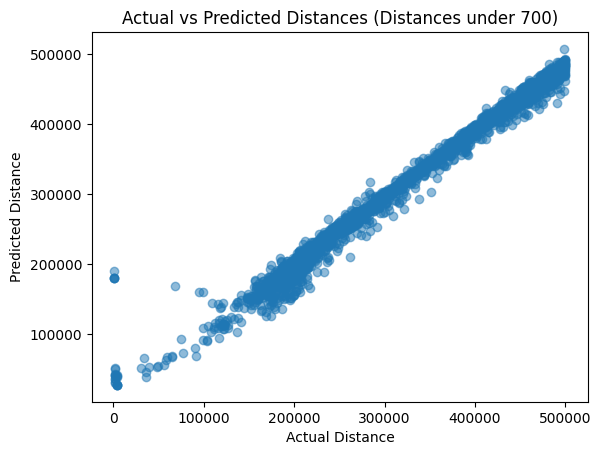

In [19]:
import matplotlib.pyplot as plt

# Assuming 'model' is your trained neural network model
# Assuming 'X_test_scaled' contains the scaled features of your test set
# Assuming 'y_test' contains the actual distances in the test set

# Make predictions on the test set
y_pred = model.predict(X_test_scaled).flatten()

# Filter data for distances under 700
mask = y_test < 500000
y_test_filtered = y_test[mask]
y_pred_filtered = y_pred[mask]

# Create a scatter plot for actual vs predicted distances under 700
plt.scatter(y_test_filtered, y_pred_filtered, alpha=0.5)
plt.title('Actual vs Predicted Distances (Distances under 700)')
plt.xlabel('Actual Distance')
plt.ylabel('Predicted Distance')
plt.show()


In [ ]:
# Make predictions on the test set
y_pred = model.predict(X_test_scaled).flatten()

# Display the actual and predicted distances as lists
for actual, predicted in zip(y_test, y_pred):
    print(f"Actual: {actual}, Predicted: {predicted}")

In [11]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.svm import SVR
from sklearn.metrics import mean_absolute_error

# Load your KITTI dataset from the Excel file or any other source
# Assuming the DataFrame is named df and contains the 'Distance' column

# Extract features (X) and target variable (y)
X = df[['Rotation_y', 'encoded_column', 
        'BoundingBox_X1', 'BoundingBox_Y1', 'BoundingBox_X2', 'BoundingBox_Y2',
        'Dimensions_Length', 'Dimensions_Width', 'Dimensions_Height',
        'Location_x', 'Location_y', 'Location_z']]
y = df['Distance']

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize features using StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Initialize regression models
linear_reg = LinearRegression()
decision_tree_reg = DecisionTreeRegressor()
random_forest_reg = RandomForestRegressor()
svm_reg = SVR()
gradient_boosting_reg = GradientBoostingRegressor()

# Train regression models
linear_reg.fit(X_train_scaled, y_train)
decision_tree_reg.fit(X_train_scaled, y_train)
random_forest_reg.fit(X_train_scaled, y_train)
svm_reg.fit(X_train_scaled, y_train)
gradient_boosting_reg.fit(X_train_scaled, y_train)

# Make predictions on the test set
linear_reg_preds = linear_reg.predict(X_test_scaled)
decision_tree_reg_preds = decision_tree_reg.predict(X_test_scaled)
random_forest_reg_preds = random_forest_reg.predict(X_test_scaled)
svm_reg_preds = svm_reg.predict(X_test_scaled)
gradient_boosting_reg_preds = gradient_boosting_reg.predict(X_test_scaled)

# Evaluate regression models
linear_reg_mae = mean_absolute_error(y_test, linear_reg_preds)
decision_tree_reg_mae = mean_absolute_error(y_test, decision_tree_reg_preds)
random_forest_reg_mae = mean_absolute_error(y_test, random_forest_reg_preds)
svm_reg_mae = mean_absolute_error(y_test, svm_reg_preds)
gradient_boosting_reg_mae = mean_absolute_error(y_test, gradient_boosting_reg_preds)

# Print Mean Absolute Errors
print(f'Linear Regression MAE: {linear_reg_mae}')
print(f'Decision Tree Regression MAE: {decision_tree_reg_mae}')
print(f'Random Forest Regression MAE: {random_forest_reg_mae}')
print(f'Support Vector Regression MAE: {svm_reg_mae}')
print(f'Gradient Boosting Regression MAE: {gradient_boosting_reg_mae}')


Linear Regression MAE: 15797.817389883852
Decision Tree Regression MAE: 1938.9501041749318
Random Forest Regression MAE: 1426.3982841333
Support Vector Regression MAE: 186063.82836822388
Gradient Boosting Regression MAE: 2701.038584316859


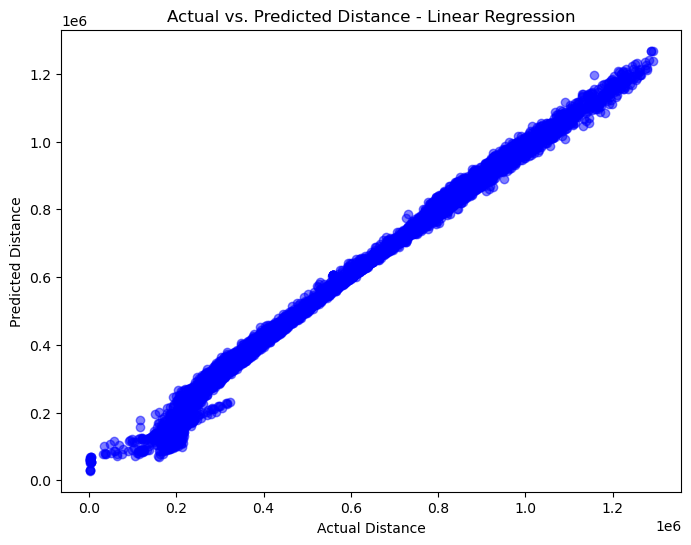

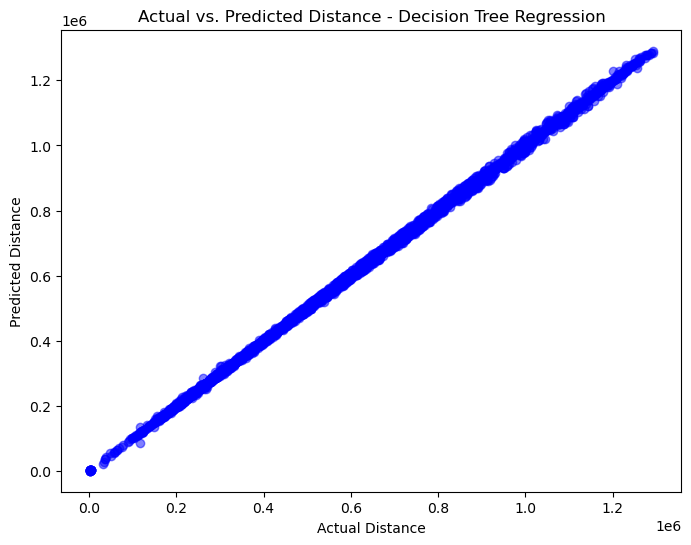

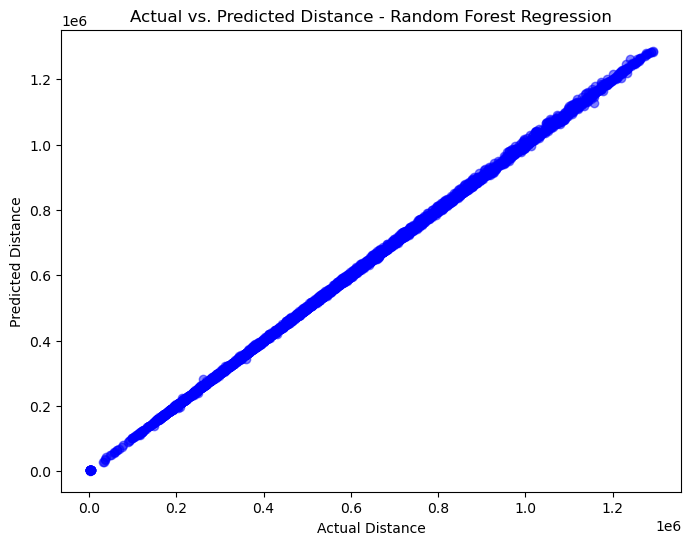

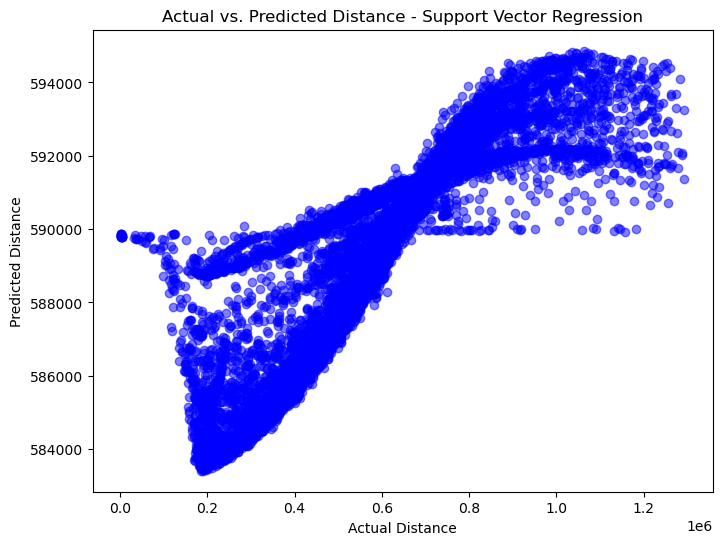

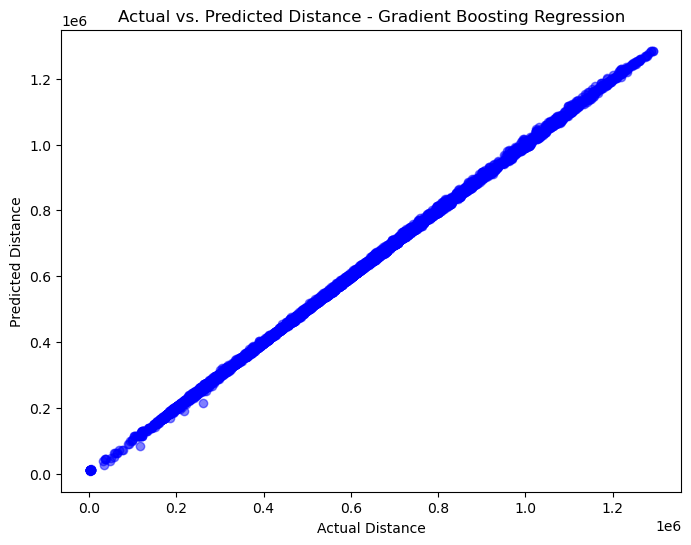

In [12]:
import matplotlib.pyplot as plt

# Scatter plot function for actual vs. predicted distances
def plot_actual_vs_predicted(actual, predicted, model_name):
    plt.figure(figsize=(8, 6))
    plt.scatter(actual, predicted, color='blue', alpha=0.5)
    plt.title(f'Actual vs. Predicted Distance - {model_name}')
    plt.xlabel('Actual Distance')
    plt.ylabel('Predicted Distance')
    plt.show()

# Plot for Linear Regression
plot_actual_vs_predicted(y_test, linear_reg_preds, 'Linear Regression')

# Plot for Decision Tree Regression
plot_actual_vs_predicted(y_test, decision_tree_reg_preds, 'Decision Tree Regression')

# Plot for Random Forest Regression
plot_actual_vs_predicted(y_test, random_forest_reg_preds, 'Random Forest Regression')

# Plot for Support Vector Regression
plot_actual_vs_predicted(y_test, svm_reg_preds, 'Support Vector Regression')

# Plot for Gradient Boosting Regression
plot_actual_vs_predicted(y_test, gradient_boosting_reg_preds, 'Gradient Boosting Regression')


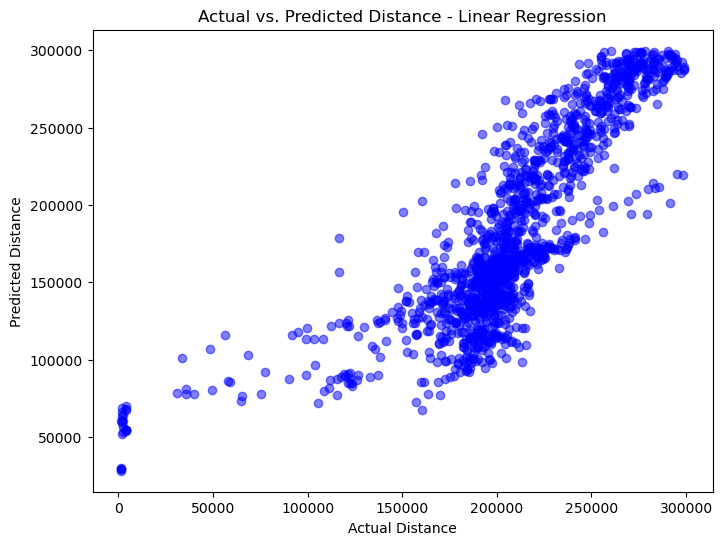

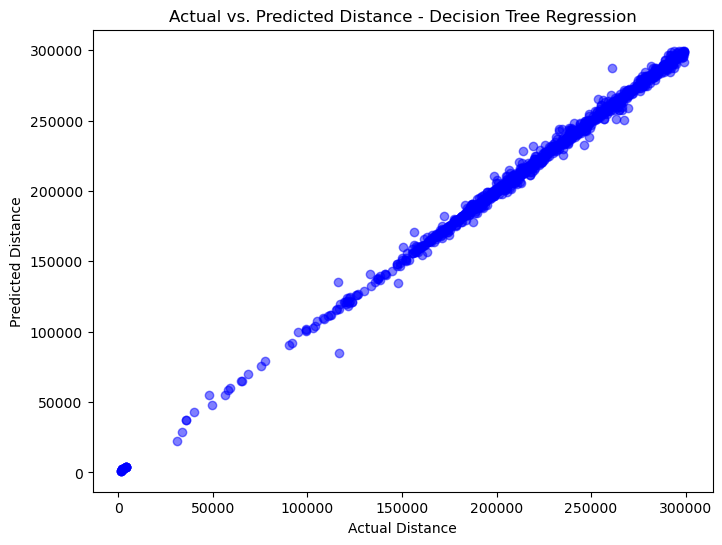

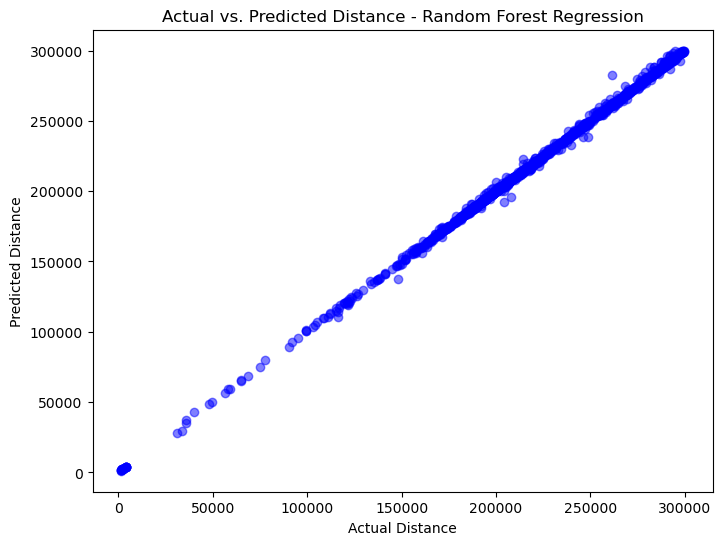

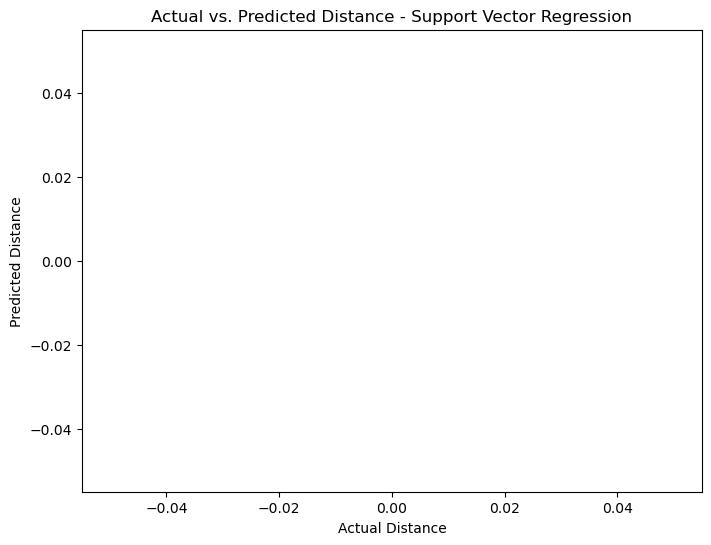

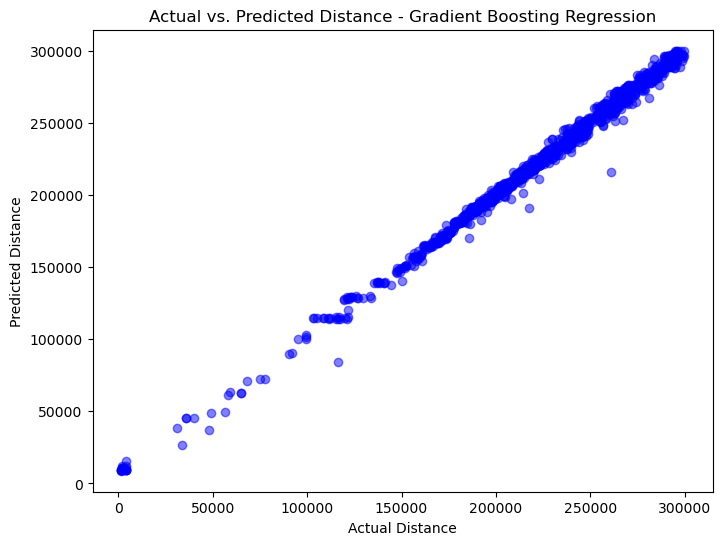

In [15]:
import matplotlib.pyplot as plt

# Scatter plot function for actual vs. predicted distances, filtering for values less than 100
def plot_actual_vs_predicted_less_than_100(actual, predicted, model_name):
    # Filter data for distances less than 100
    mask = (actual < 300000) & (predicted < 300000)
    actual_filtered = actual[mask]
    predicted_filtered = predicted[mask]

    plt.figure(figsize=(8, 6))
    plt.scatter(actual_filtered, predicted_filtered, color='blue', alpha=0.5)
    plt.title(f'Actual vs. Predicted Distance - {model_name}')
    plt.xlabel('Actual Distance')
    plt.ylabel('Predicted Distance')
    plt.show()

# Plot for Linear Regression
plot_actual_vs_predicted_less_than_100(y_test, linear_reg_preds, 'Linear Regression')

# Plot for Decision Tree Regression
plot_actual_vs_predicted_less_than_100(y_test, decision_tree_reg_preds, 'Decision Tree Regression')

# Plot for Random Forest Regression
plot_actual_vs_predicted_less_than_100(y_test, random_forest_reg_preds, 'Random Forest Regression')

# Plot for Support Vector Regression
plot_actual_vs_predicted_less_than_100(y_test, svm_reg_preds, 'Support Vector Regression')

# Plot for Gradient Boosting Regression
plot_actual_vs_predicted_less_than_100(y_test, gradient_boosting_reg_preds, 'Gradient Boosting Regression')


In [28]:
# Extract actual and predicted distances for the first 10 data points
actual_first_10 = y_test[:10]
predicted_first_10 = linear_reg_preds[:10]  # Use the appropriate model's predictions

# Print the actual and predicted distances for the first 10 data points
for actual, predicted in zip(actual_first_10, predicted_first_10):
    print(f'Actual Distance: {actual:.2f}, Predicted Distance: {predicted:.2f}')


Actual Distance: 202958.49, Predicted Distance: 111186.88
Actual Distance: 760641.78, Predicted Distance: 751698.09
Actual Distance: 1222935.34, Predicted Distance: 1241940.10
Actual Distance: 593885.37, Predicted Distance: 604243.89
Actual Distance: 620746.94, Predicted Distance: 634047.59
Actual Distance: 214071.09, Predicted Distance: 205857.16
Actual Distance: 405942.34, Predicted Distance: 424651.12
Actual Distance: 582753.19, Predicted Distance: 590267.24
Actual Distance: 761051.82, Predicted Distance: 754760.47
Actual Distance: 305091.30, Predicted Distance: 320466.73


In [29]:
# Assuming you have other models and their predictions
# Replace these with the actual models and their respective predictions
linear_reg_preds = linear_reg.predict(X_test_scaled)
decision_tree_reg_preds = decision_tree_reg.predict(X_test_scaled)
random_forest_reg_preds = random_forest_reg.predict(X_test_scaled)
svm_reg_preds = svm_reg.predict(X_test_scaled)
gradient_boosting_reg_preds = gradient_boosting_reg.predict(X_test_scaled)

# Collect all model predictions in a dictionary
all_model_predictions = {
    'Linear Regression': linear_reg_preds,
    'Decision Tree Regression': decision_tree_reg_preds,
    'Random Forest Regression': random_forest_reg_preds,
    'Support Vector Regression': svm_reg_preds,
    'Gradient Boosting Regression': gradient_boosting_reg_preds,
}

# Extract and print actual and predicted distances for the first 10 data points
for model_name, predictions in all_model_predictions.items():
    actual_first_10 = y_test[:]
    predicted_first_10 = predictions[:]

    print(f'\nModel: {model_name}')
    for actual, predicted in zip(actual_first_10, predicted_first_10):
        print(f'Actual Distance: {actual:.2f}, Predicted Distance: {predicted:.2f}')



Model: Linear Regression
Actual Distance: 202958.49, Predicted Distance: 111186.88
Actual Distance: 760641.78, Predicted Distance: 751698.09
Actual Distance: 1222935.34, Predicted Distance: 1241940.10
Actual Distance: 593885.37, Predicted Distance: 604243.89
Actual Distance: 620746.94, Predicted Distance: 634047.59
Actual Distance: 214071.09, Predicted Distance: 205857.16
Actual Distance: 405942.34, Predicted Distance: 424651.12
Actual Distance: 582753.19, Predicted Distance: 590267.24
Actual Distance: 761051.82, Predicted Distance: 754760.47
Actual Distance: 305091.30, Predicted Distance: 320466.73

Model: Decision Tree Regression
Actual Distance: 202958.49, Predicted Distance: 204167.73
Actual Distance: 760641.78, Predicted Distance: 760476.78
Actual Distance: 1222935.34, Predicted Distance: 1219967.28
Actual Distance: 593885.37, Predicted Distance: 594127.03
Actual Distance: 620746.94, Predicted Distance: 626029.40
Actual Distance: 214071.09, Predicted Distance: 217211.84
Actual Di

In [32]:
gradient_boosting_reg_preds = gradient_boosting_reg.predict(X_test_scaled)

# Collect all model predictions in a dictionary
all_model_predictions = {
    'Gradient Boosting Regression': gradient_boosting_reg_preds,
}

# Extract and print actual and predicted distances for the first 10 data points
for model_name, predictions in all_model_predictions.items():
    actual_first_10 = y_test[:]
    predicted_first_10 = predictions[:]
    actual1 = []
    predicted1 = []
    print(f'\nModel: {model_name}')
    for actual, predicted in zip(actual_first_10, predicted_first_10):
        actual1.append(actual)
        predicted1.append(predicted)


Model: Gradient Boosting Regression


[0.01807644 0.27882033 0.15641059 ... 0.1190987  0.36745144 0.47482628]


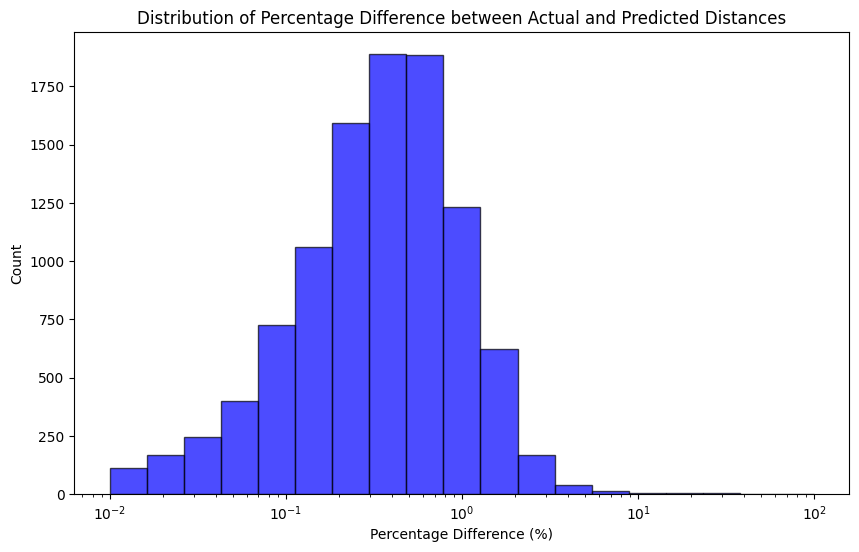

In [36]:
import matplotlib.pyplot as plt
import numpy as np

# Example data (replace these with your actual and predicted lists)
actual_distances =actual1
predicted_distances = predicted1 # Example with some variance

# Calculate the percentage difference
percentage_difference = np.abs((np.array(predicted_distances) - np.array(actual_distances)) / np.array(actual_distances)) * 100
print(percentage_difference)
# Plotting
plt.figure(figsize=(10, 6))

# Create a histogram
plt.hist(percentage_difference, bins=np.logspace(-2, 2, 20), color='blue', edgecolor='black', alpha=0.7)

# Set the x-axis to a logarithmic scale for better visibility
plt.xscale('log')

# Add labels and title
plt.xlabel('Percentage Difference (%)')
plt.ylabel('Count')
plt.title('Distribution of Percentage Difference between Actual and Predicted Distances')

# Show the plot
plt.show()


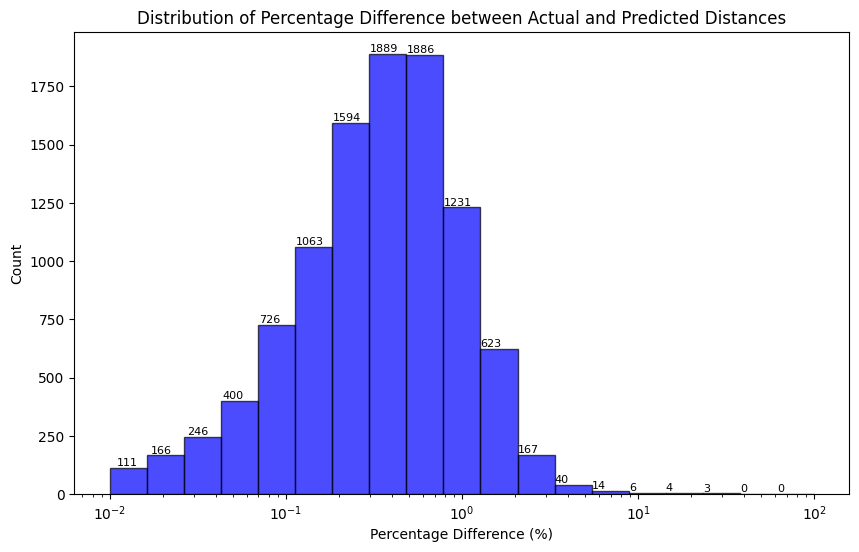

In [72]:
import matplotlib.pyplot as plt
import numpy as np

# Example data (replace these with your actual and predicted lists)
actual_distances = actual1
predicted_distances = predicted1  # Example with some variance

# Calculate the percentage difference
percentage_difference = np.abs((np.array(predicted_distances) - np.array(actual_distances)) / np.array(actual_distances)) * 100

# Plotting
plt.figure(figsize=(10, 6))

# Create a histogram
counts, bins, patches = plt.hist(percentage_difference, bins=np.logspace(-2, 2, 20), color='blue', edgecolor='black', alpha=0.7)

# Set the x-axis to a logarithmic scale for better visibility
plt.xscale('log')

# Add labels and title
plt.xlabel('Percentage Difference (%)')
plt.ylabel('Count')
plt.title('Distribution of Percentage Difference between Actual and Predicted Distances')

# Annotate each bar with its count
for count, bin_edge, patch in zip(counts, bins[:-1], patches):
    plt.text(bin_edge + 0.001, count, f'{int(count)}', fontsize=8, verticalalignment='bottom')

# Show the plot
plt.show()



In [20]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from tensorflow import keras
from tensorflow.keras import layers

# Load your KITTI dataset from the Excel file or any other source
# Assuming the DataFrame is named df and contains the 'Distance' column

# Extract features (X) and target variable (y)
X = df[['Truncation', 'Occlusion State', 'Alpha Rotation', 'Bounding Box Coordinates', 'Rotation_y', 'Dimensions', 'Location_x', 'Location_y', 'Location_z']]
X[['BoundingBox_X1', 'BoundingBox_Y1', 'BoundingBox_X2', 'BoundingBox_Y2']] = pd.DataFrame(df['Bounding Box Coordinates'].tolist(), index=df.index)
X[['Dimensions_Length', 'Dimensions_Width', 'Dimensions_Height']] = pd.DataFrame(df['Dimensions'].tolist(), index=df.index)
X[['Location_X', 'Location_Y', 'Location_Z']] = pd.DataFrame(df['Location'].tolist(), index=df.index)

y = df['Distance']

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print(X_train)
# Standardize features using StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Build a simple neural network model
model = keras.Sequential([
    layers.Dense(64, activation='relu', input_shape=(X_train_scaled.shape[1],)),
    layers.Dense(32, activation='relu'),
    layers.Dense(1)  # Output layer with a single neuron for regression
])

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error', metrics=['mae'])

# Train the model
model.fit(X_train_scaled, y_train, epochs=50, batch_size=32, validation_split=0.2)

# Evaluate the model on the test set
test_loss, test_mae = model.evaluate(X_test_scaled, y_test)
print(f'Test Mean Absolute Error: {test_mae}')

# Save the trained model
model.save('distance_prediction_model.h5')


       Truncation  Occlusion State  Alpha Rotation  \
17023       -1.00               -1          -10.00   
2290         0.00                1            1.87   
31067        0.66                3            2.20   
10490       -1.00               -1          -10.00   
46569       -1.00               -1          -10.00   
...           ...              ...             ...   
11284        0.00                0            2.03   
44732        0.00                2            1.83   
38158        0.00                1           -1.58   
860          0.00                0            0.25   
15795        0.00                1            1.78   

                Bounding Box Coordinates  Rotation_y          Dimensions  \
17023  [1211.4, 139.13, 1239.98, 185.35]      -10.00  [-1.0, -1.0, -1.0]   
2290     [416.99, 182.5, 523.81, 243.47]        1.68   [1.48, 1.65, 4.4]   
31067       [0.0, 171.35, 66.22, 301.11]        1.50  [1.87, 0.86, 2.12]   
10490    [521.85, 171.48, 573.25, 187.3]      -

C:\Users\saipr\AppData\Local\Temp\ipykernel_15696\467966920.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X[['BoundingBox_X1', 'BoundingBox_Y1', 'BoundingBox_X2', 'BoundingBox_Y2']] = pd.DataFrame(df['Bounding Box Coordinates'].tolist(), index=df.index)
C:\Users\saipr\AppData\Local\Temp\ipykernel_15696\467966920.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X[['BoundingBox_X1', 'BoundingBox_Y1', 'BoundingBox_X2', 'BoundingBox_Y2']] = pd.DataFrame(df['Bounding Box Coordinates'].tolist(), index=

ValueError: setting an array element with a sequence.